In [36]:
import pandas as pd
df = pd.read_csv("../data/processed/merged_clean_dataset.csv")

df['label'].value_counts()


label
FAKE    23481
REAL    21417
Name: count, dtype: int64

C:\Users\kknah\AppData\Local\Temp\ipykernel_45192\4067431196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


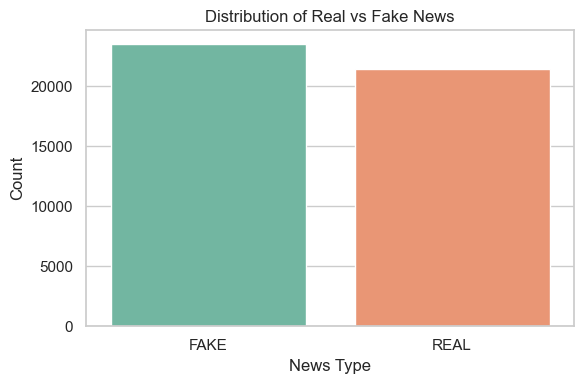

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

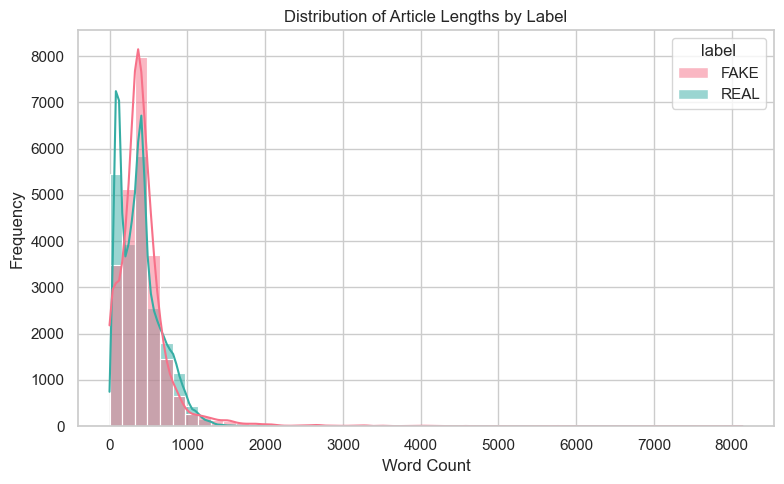

In [38]:
def count_words(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    return len(text.split())

df['text_length'] = df['text'].apply(count_words)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette='husl')
plt.title('Distribution of Article Lengths by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Check for missing values
print("Missing values in text column:")
print(f"REAL news: {df[df['label']=='REAL']['text'].isna().sum()}")
print(f"FAKE news: {df[df['label']=='FAKE']['text'].isna().sum()}")
print(f"Total missing: {df['text'].isna().sum()}")

# Alternative: fill NaN with empty strings instead of dropping
# real_text = ' '.join(df[df['label']=='REAL']['text'].fillna('').astype(str))
# fake_text = ' '.join(df[df['label']=='FAKE']['text'].fillna('').astype(str))

Missing values in text column:
REAL news: 0
FAKE news: 9
Total missing: 9


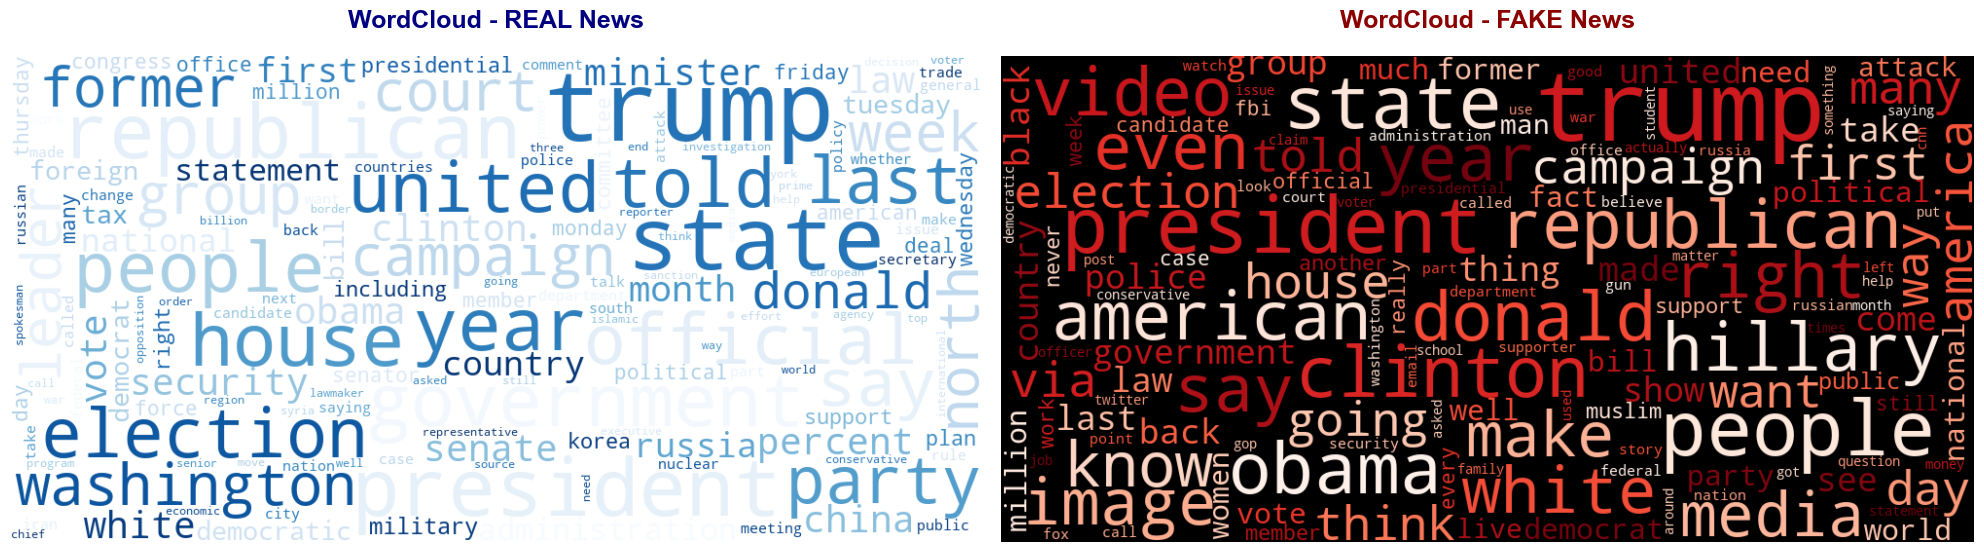


Top 15 words in REAL news:
trump: 47335
president: 26011
state: 19381
government: 18386
house: 17844
states: 17819
republican: 15923
united: 15622
people: 15212
told: 14285
last: 12690
trumps: 12435
washington: 12263
election: 12004
party: 11688

Top 15 words in FAKE news:
trump: 81157
president: 26668
people: 26449
obama: 19624
clinton: 18977
donald: 18054
like: 17997
video: 16137
hillary: 15338
even: 13895
white: 13615
state: 12957
media: 11634
via: 11288
america: 11109

Words more distinctive to REAL news:
government: 18386 (real) vs 8776 (fake)
trumps: 12435 (real) vs 1798 (fake)
washington: 12263 (real) vs 5587 (fake)
north: 10767 (real) vs 2680 (fake)
percent: 10077 (real) vs 4262 (fake)
senate: 9729 (real) vs 3668 (fake)
minister: 9090 (real) vs 1011 (fake)
officials: 8697 (real) vs 3819 (fake)
china: 8559 (real) vs 1195 (fake)
foreign: 8469 (real) vs 3446 (fake)

Words more distinctive to FAKE news:
obama: 19624 (fake) vs 7641 (real)
clinton: 18977 (fake) vs 8466 (real)
like: 

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data (run once)
# nltk.download('stopwords')
# nltk.download('punkt')

def preprocess_text(text):
    """Clean and preprocess text for better word clouds"""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

def remove_stopwords(text, additional_stopwords=None):
    """Remove common stopwords that don't add meaning"""
    stop_words = set(stopwords.words('english'))
    
    # Add common news stopwords
    news_stopwords = {'said', 'would', 'could', 'one', 'two', 'also', 'new', 'may', 
                     'reuters', 'ap', 'news', 'report', 'reports', 'according', 'time'}
    stop_words.update(news_stopwords)
    
    if additional_stopwords:
        stop_words.update(additional_stopwords)
    
    words = word_tokenize(text)
    filtered_text = ' '.join([word for word in words if word.lower() not in stop_words and len(word) > 2])
    return filtered_text

# Preprocess texts - handle NaN values
real_text = ' '.join(df[df['label']=='REAL']['text'].dropna().astype(str))
fake_text = ' '.join(df[df['label']=='FAKE']['text'].dropna().astype(str))

# Clean the texts
real_text_clean = preprocess_text(real_text)
fake_text_clean = preprocess_text(fake_text)

# Remove stopwords
real_text_filtered = remove_stopwords(real_text_clean)
fake_text_filtered = remove_stopwords(fake_text_clean)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# WordCloud for REAL news
wordcloud_real = WordCloud(
    width=1000, 
    height=500, 
    background_color='white',
    colormap='Blues',
    max_words=150,
    relative_scaling=0.3,
    min_font_size=12,
    max_font_size=100,
    random_state=42,
    collocations=False
).generate(real_text_filtered)

ax1.imshow(wordcloud_real, interpolation='bilinear')
ax1.axis('off')
ax1.set_title("WordCloud - REAL News", fontsize=18, fontweight='bold', pad=20, color='navy')

# WordCloud for FAKE news
wordcloud_fake = WordCloud(
    width=1000, 
    height=500, 
    background_color='black',
    colormap='Reds',
    max_words=150,
    relative_scaling=0.3,
    min_font_size=12,
    max_font_size=100,
    random_state=42,
    collocations=False
).generate(fake_text_filtered)

ax2.imshow(wordcloud_fake, interpolation='bilinear')
ax2.axis('off')
ax2.set_title("WordCloud - FAKE News", fontsize=18, fontweight='bold', pad=20, color='darkred')

plt.tight_layout()
plt.show()

# Optional: Show most common words numerically
def show_top_words(text, label, n=20):
    """Display the most common words as a list"""
    words = text.split()
    word_freq = Counter(words)
    print(f"\nTop {n} words in {label} news:")
    for word, freq in word_freq.most_common(n):
        print(f"{word}: {freq}")

show_top_words(real_text_filtered, "REAL", 15)
show_top_words(fake_text_filtered, "FAKE", 15)

# Optional: Compare unique words between categories
def find_distinctive_words(real_words, fake_words, top_n=10):
    """Find words that appear more frequently in one category vs another"""
    real_counter = Counter(real_words.split())
    fake_counter = Counter(fake_words.split())
    
    # Words more common in real news
    real_distinctive = []
    for word, count in real_counter.most_common(50):
        fake_count = fake_counter.get(word, 0)
        if count > fake_count * 2:  # At least 2x more frequent
            real_distinctive.append((word, count, fake_count))
    
    # Words more common in fake news  
    fake_distinctive = []
    for word, count in fake_counter.most_common(50):
        real_count = real_counter.get(word, 0)
        if count > real_count * 2:  # At least 2x more frequent
            fake_distinctive.append((word, count, real_count))
    
    print(f"\nWords more distinctive to REAL news:")
    for word, real_count, fake_count in real_distinctive[:top_n]:
        print(f"{word}: {real_count} (real) vs {fake_count} (fake)")
        
    print(f"\nWords more distinctive to FAKE news:")
    for word, fake_count, real_count in fake_distinctive[:top_n]:
        print(f"{word}: {fake_count} (fake) vs {real_count} (real)")

find_distinctive_words(real_text_filtered, fake_text_filtered)